In [48]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import data.collected_data.methods.get_listing_median_price as gt
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (15, 10)},
        style="whitegrid", font_scale= 0.8)


In [49]:
path_to_csv = '/Users/eaxes/DA Projects/CMC/data/collected_data/mined/price_token_test.csv'
df = pd.read_csv(path_to_csv, index_col=0)
df = df.query('for_charts == True')
df


,name,ticker,platform_raise,coingecko_id,coingecko_numerical_id,sho_price,median_listing_sell_price,ath_median_listing,for_charts
0,Gamium,GMM,200000,gamium,22749,0.0003,0.0020978153826027,6.9927179420089995,True
2,AdaSwap,ASW,195000,adaswap,24453,0.005,0.0355824699101078,7.11649398202156,True
3,Step.app,FITFI,2750000,step-app-fitfi,25015,0.0049,0.1878854602035458,38.34397147011139,True
4,DragonSB,SB,195000,dragonsb,23738,0.15,0.3267951753518027,2.1786345023453513,True
5,DeFiato,DFIAT,600000,defiato,13386,0.08,0.1197949601008165,1.4974370012602063,True
...,...,...,...,...,...,...,...,...,...
92,DAO Maker,DAO,3900000,dao-maker,13915,0.1,2.873655040212752,28.73655040212752,True
93,AnRKey X™,ANRX,125000,anrkey-x,13415,0.025,0.0807808414286971,3.2312336571478837,True
94,PlotX,No ticket found through transform function,250000,plotx,12795,0.05,0.1350403374578565,2.70080674915713,True
95,DeFiner,No ticket found through transform function,96000,definer,12780,0.6,1.1935061783750534,1.9891769639584223,True


/Users/eaxes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ath_median_listing', ylabel='Density'>

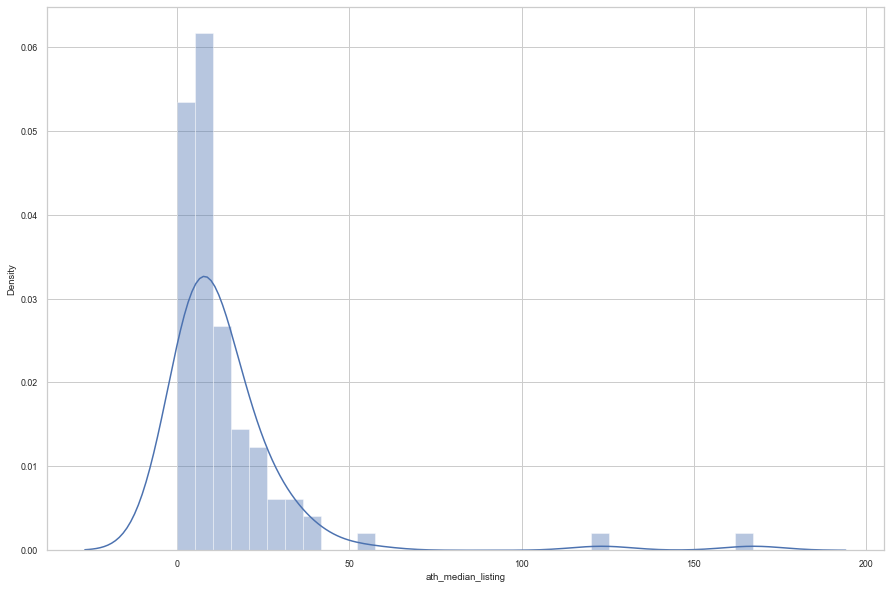

In [51]:
sns.distplot(df.ath_median_listing)

In [57]:
pd.to_numeric(df.ath_median_listing).describe()

count    9.300000e+01
mean     1.440140e+01
std      2.214222e+01
min      1.733519e-36
25%      4.861878e+00
50%      7.852365e+00
75%      1.701591e+01
max      1.673117e+02
Name: ath_median_listing, dtype: float64

/Users/eaxes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ath_median_listing', ylabel='Density'>

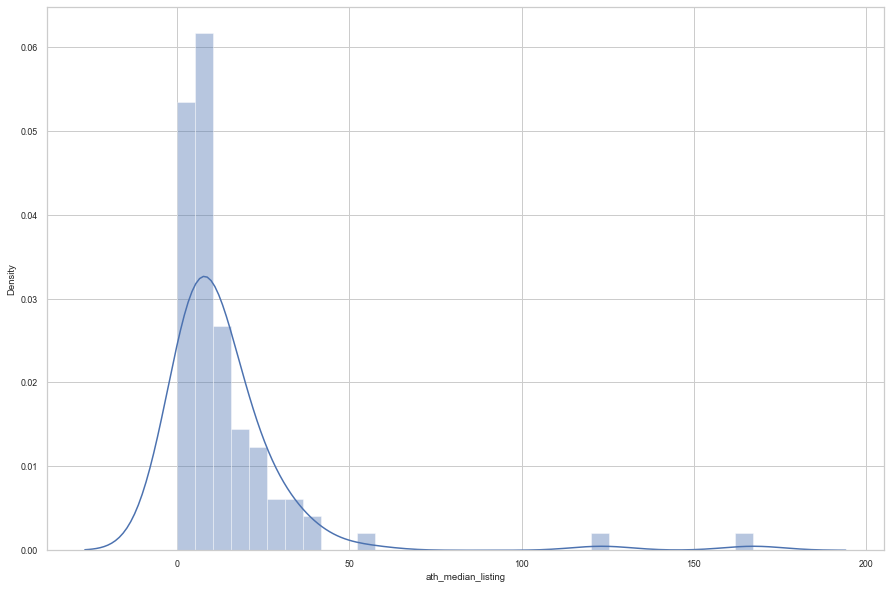

In [55]:
sns.distplot(pd.to_numeric(df.ath_median_listing))

In [61]:
0.5 ** 5

0.03125

In [63]:
(0.5 + 0.25 + 0.125 + 0.0625 + 0.03125) / 5 

0.19375

In [64]:
0 * 0.5 + 1*0.25 + 2*0.125 + 3*0.0625 + 4*0.03125

0.8125

In [65]:
(0 - 0.8125)**2 * 0.5 + (1 - 0.8125)**2 * 0.25 + (2 - 0.8125)**2 * 0.125 + (3 - 0.8125)**2 * 0.0625 + (4 - 0.8125)**2 * 0.03125

1.1317138671875

In [66]:
0.3 ** 4

0.0081

In [67]:
0.7 + 0.21 + 0.063 + 0.0189 + 0.0081

0.9999999999999999

In [68]:
1 * 0.7 + 2*0.21 + 3*0.063 + 4*0.0189

1.3845999999999998

In [73]:
1 * 0.7 + 2*0.21 + 3*0.063 + 4*0.0189 + 5*0.0081


1.4250999999999998

In [75]:
(1 - 1.425) **2 * 0.7 + (2 - 1.425) **2 * 0.21 + (3 - 1.425) **2 * 0.063 + (4 - 1.425) **2 * 0.0189  + (5 - 1.425) **2 * 0.0081

0.58099

In [76]:
0*0.6 + 1*0.2 + 2*0.08 + 3*0.12

0.72

In [77]:
(0 - 0.72)**2 * 0.6 + (1 - 0.72)**2 * 0.2 + (2 - 0.72)**2 * 0.08 + (3 - 0.72)**2 * 0.12

1.0816000000000001

In [78]:
(0 - 0.6)**2 * 0.6 + (1 - 0.6)**2 * 0.2 + (2 - 0.6)**2 * 0.2

0.6399999999999999

In [79]:
#Задача 4. В ящике содержится 7 стандартных и 3 бракованных детали. 
#Вынимают детали последовательно до появления стандартной, не возвращая их обратно. 
#ξ - число извлеченных бракованных деталей. Составить закон распределения дискретной случайной величины ξ, 
#вычислить ее математическое ожидание, дисперсию, среднее квадратическое отклонение, начертить многоугольник 
#распределения и график функции распределения.

# Пусть Х случайная дискретная величина обозначающая количество бракованных деталей, которые вытащены из
# ящика до появления стандартной детали. 
# Х принимает значение 0 если мы сразу вытащили из ящика стандартную деталь. Р(Х=0) = 0,7
# Х принимает значение 1 если мы вытащили одну бракованную деталь и потом стандартную
# Р(Х=1) = 0,3 * 0,777 = 0,2333 
# Х принимает значение 2 если мы вытащили две бракованные детали и потом стандартную.
# Р(Х=2) = 0,3 * 0,222 * 0,875 = 0,0582
# Х принимает значение 3 если мы вытащили три бракованные детали и потом стандартную.
# Х(Р=3) = 0,3 * 0,222 * 0,125 = 0,008325

# Распределение случайной величины Х принимает следующий вид: 
# Х    0        1         2           3
# P   0,7.   0,2333    0,0582     0,008325

# Расчет математического ожидания
# М(х) = СУММ Pi * Xi = 0 * 0,7 + 1 * 0,2333 + 2 * 0,0582 + 3 * 0,008325 = 0,3746
# Расчет дисперсии
# D(x) = СУММ (Xi - M(x))**2 * Pi = (0 - 0.3746) ** 2 * 0.7 + (1 - 0.3746) ** 2 * 0.2333 + 
# (2 - 0.3746) ** 2 * 0.0582 + (3 - 0.3746) ** 2 * 0.008325 = 0.4
# Среднеквадратическая ошибка
# d = КОРЕНЬ 0,4 = 0.6324


In [81]:
(0 - 0.3746) ** 2 * 0.7 + (1 - 0.3746) ** 2 * 0.2333 + (2 - 0.3746) ** 2 * 0.0582 + (3 - 0.3746) ** 2 * 0.008325

0.40061909309699995

In [83]:
0.4 ** 0.5

0.6324555320336759

In [84]:
#Задача 5. На переэкзаменовку по теории вероятностей явились 3 студента. 
#Вероятность того, что первый сдаст экзамен, равна 0,8, второй - 0,7, третий - 0,9. 
#Найдите ряд распределения случайной величины ξ числа студентов, сдавших экзамен, постройте 
#график функции распределения, найдите М(ξ),D(ξ).

#Пусть случайная величина Х отражает количество студентов, сдавших экзамен и принимает значения 0, 1, 2, 3
# Пусть Р(A1) - вероятность того, что первый студент сдаст экзамен. Р(А1) = 0.8
# Пусть Р(А2) - вероятность того, что второй студент сдаст экзамен. Р(А2) = 0.7
# Пусть Р(А3) - вероятность того, что третий студент сдаст экзамен. Р(А3) = 0.9

#Случайная величина Х принимает значение 0 если никто из студентов не сдал экзамен. Р(Х=0) = Р(А1^)*P(A2^)*P(A3^) =
# = 0.2 * 0.3 * 0.1 = 0,006
# Случайная величина Х принимает значение 1 если один студент сдал экзамен. 
# Р(Х=1) = P(A1)*P(A2^)*P(A3^) + P(A1^)*P(A2)*P(A3^) + P(A1^)*P(A2^)*P(A3) = 
# = 0.8*0.3*0.1 + 0.2*0.7*0.1 + 0.2*0.3*0.9 = 0.092
# Случайная величина Х принимает значение 2 если два студента сдали экзамен.
# Р(X=2) = P(A1)*P(A2)*P(A3^) + P(A1)*P(A2^)*P(A3) + P(A1^)*P(A2)*P(A3) = 
# = 0.8*0.7*0.1 + 0.8*0.3*0.9 + 0.2*0.7*0.9 = 0.398
# Случайная величина Х принимает значение 3 если три студента сдали экзамен
# P(X=3) = P(A1)*P(A2)*P(A3) = 0.8 * 0.7 * 0.9 = 0,504
# Распределение дискретной случайной величины принимает следующий вид:
# Х      0       1         2          3
# P    0,006    0,092    0,398      0,504
# Математическое ожидание М(Х): 
# М(Х) = СУММ Xi * Pi = 0*0.006 + 1*0.092 + 2*0.398 + 3*0.504 = 2,4
# Дисперсия D(X):
# D(X) = CYMM (X - M(X))**2 * Pi = (0 - 2.4)**2*0.006 + (1 - 2.4)**2*0.092
# +(2 - 2.4)**2*0.398 + (3 - 2.4)**2*0.504 = 0.46
# Среднеквадратическая ошибка:
# d = 0.6782

In [85]:
0.8*0.3*0.1 + 0.2*0.7*0.1 + 0.2*0.3*0.9

0.092

In [86]:
0.8*0.7*0.1 + 0.8*0.3*0.9 + 0.2*0.7*0.9

0.398

In [88]:
0*0.006 + 1*0.092 + 2*0.398 + 3*0.504

2.4

In [89]:
(0 - 2.4)**2*0.006 + (1 - 2.4)**2*0.092 +(2 - 2.4)**2*0.398 + (3 - 2.4)**2*0.504

0.46

In [90]:
0.46 ** 0.5

0.6782329983125268

In [91]:
#Задача 6. Вероятность попадания в цель при одном выстреле равна 0,8 
#и уменьшается с каждым выстрелом на 0,1. Составить закон распределения 
#числа попаданий в цель, если сделано три выстрела. Найти математическое ожидание, 
#дисперсию и С.К.О. этой случайной величины. Построить график функции распределения.

# Пусть Х случайная дискретная величина отображающая число совершенных выстрелов для попадания в мишень
# и принимающее значения 1, 2, 3, 4
# P(A1) = 0.9, P(A2) = 0.8, P(A3) = 0.7
# Случайная величина Х принимает значение 0 если все три выстрела были произведены мимо цели
# Р(Х=0) = P(A1^) * P(A2^) * P(A3^) = 0.1 * 0.2 * 0.3 = 0.006
# Случайная величина Х принимает значение 1 если один выстрел попал в цель
# P(X=1) = P(A1)*P(A2^)*P(A3^) + P(A1^)*P(A2)*P(A3^) + P(A1^)*P(A2^)*P(A3) =
# = 0.9*0.2*0.3 + 0.1*0.8*0.3 + 0.1*0.2*0.7 = 0.092
# P(X=2) = P(A1)*P(A2)*P(A3^) + P(A1)*P(A2^)*P(A3) + P(A1^)*P(A2)*P(A3) =
# = 0.9*0.8*0.3 + 0.9*0.2*0.7 + 0.1*0.8*0.7 = 0.398
# P(X=3) = 0.9*0.8*0.7 = 0.504
# Распределение случайной величины Х
# X.     0.   1.     2.    3
# P.  0.006 0.092  0.398 0.504
# M(X) = CYMM Pi*Xi = 0*0.006 + 1*0.092 + 2*0.398 + 3*0.504 = 2.4
# D(X) = СУММ (X - M(X))**2*Pi = (0 - 2.4)**2*0.006 + (1 - 2.4)**2*0.092 + 
# (2 - 2.4)**2*0.398 + (3 - 2.4)**2*0.504 = 2.4
# d = 1

In [99]:
0*0.006 + 1*0.092 + 2*0.398 + 3*0.504

2.4

In [100]:
2.4**0.5

1.5491933384829668